In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('fsa_indicators_ratios.csv')

c:\Users\jorda\anaconda3\envs\xarray\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


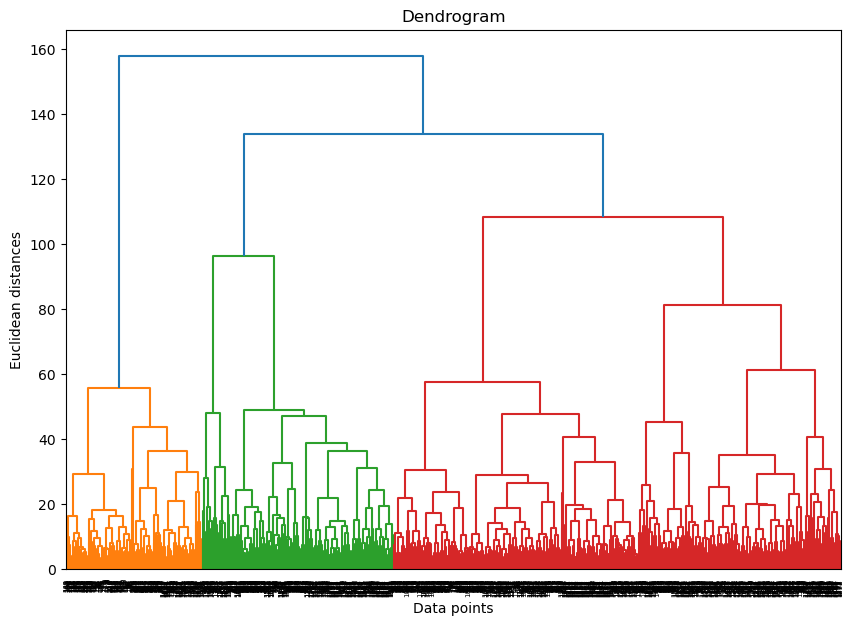

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Extract 'geo_name' and store it separately
geo_names = df['geo_name']
df_clustering = df.drop(columns=['geo_name'])

# Remove rows with missing values and keep their indices
df_no_na = df_clustering.dropna()
indices_no_na = df_no_na.index

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_na)

# Using Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(df_scaled)

# Add cluster labels to the dataframe for rows without missing values
df['cluster'] = np.nan  # default value for all rows
df.loc[indices_no_na, 'cluster'] = labels
df['geo_name'] = geo_names

# To visualize the hierarchy
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()


In [3]:
print(df.columns)

Index(['geo_name', 'people per km2', 'Average age of the population',
       'Median age of the population', '0 to 4 years', '5 to 9 years',
       '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years',
       '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
       '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years',
       '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years',
       '90 to 94 years', '95 to 99 years', '100 years and over',
       'Single-detached house', 'Semi-detached house', 'Row house',
       'Apartment or flat in a duplex',
       'Apartment in a building that has fewer than five storeys',
       'Apartment in a building that has five or more storeys',
       'Other single-attached house', 'Movable dwelling',
       'Mobility status 1 year ago: Non-movers',
       'Mobility status 1 year ago: Non-migrants',
       'Mobility status 1 year ago: Intraprovincial migrants',
       'Mobility s

In [4]:
df.to_csv('fsa_AgglomerativeClustering_20_clusters.csv', index=False)